# Simulation d'une cavité carrée avec les plans de symétrie (XZ) et (YZ), la postion du carré : Rotation 45 degré 

In [1]:
import meep as mp
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Initialized parameter 

b = 1          # base of the square (On peut prend l'unité) 10 pixel 
pml = 0.02     # the thickness of pml layer
pad = 0.02     # the padding between the cavity and the pml layer
n = 1.5        # refractive index the cavity (used resin)
resolution = 200
len_scale = 25

sxy = b*np.sqrt(2) + 2*pml + 2*pad
cell_size = mp.Vector3(sxy, sxy, 0)

# Booudary conditions (using perfect matched layer)
boudary_layer = mp.PML(pml)

# Geometry of the cavity (rotated 45 degree)
geometry = [mp.Block(mp.Vector3(b,b,mp.inf),
                     mp.Vector3(1,1,0), 
                     mp.Vector3(1,-1,0),
                     center=mp.Vector3(),
                     material=mp.Medium(index=n))]

# Injected sources
wl = 2                     # wavelenght in micrometer / in vaccum        
fcen = len_scale/wl          # pulse center frequency
df = 24                      # pulse frequency width

#src = mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, mp.Vector3(0))
sources_centers = [mp.Vector3(-0.11,0.07), mp.Vector3(0.11,0.07), mp.Vector3(0.11,-0.07), mp.Vector3(-0.11,-0.07)]
sources_size = mp.Vector3(0)
sources_amps = [-1,1,-1,1]

src = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, sources_centers[0], sources_size, sources_amps[0]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, sources_centers[1], sources_size, sources_amps[1]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, sources_centers[2], sources_size, sources_amps[2]),
       mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, sources_centers[3], sources_size, sources_amps[3])]

#Simulation
sim = mp.Simulation(cell_size= cell_size,
                    geometry= geometry,
                    sources=src,
                    symmetries=[mp.Mirror(mp.X, phase=-1), mp.Mirror(mp.Y, phase=-1)],
                    resolution=resolution,                    
                    boundary_layers=[boudary_layer])

In [ ]:
# visualize the cavité
f = plt.figure(dpi=150)
sim.plot2D(ax = f.gca())
plt.show()

In [3]:
# define step function to collect field Ez
def append_fields(sim):
    box = mp.Volume(center=pt_harminv, size=mp.Vector3(0,0))
    ez_fields.append(sim.get_array(vol=box, component=mp.Ez))
    hx_fields.append(sim.get_array(vol=box, component=mp.Hx))
    

In [7]:
ez_fields = []
hx_fields = []
pt_harminv = mp.Vector3(-0.2,0.05)
# Chercher les fréquences de résonnance autour de fcen avec la composante Hx, source Ez
h_hx = mp.Harminv(mp.Hx, pt_harminv, fcen, df,2000) 
sim.fields = None
sim.reset_meep()
#sim.sources = [mp.Source(mp.GaussianSource(fcen, fwidth=df), mp.Hx, mp.Vector3(-0.1))]
sim.run(mp.after_sources(h_hx),
         mp.after_sources(append_fields),
        until_after_sources=700)

-----------
Initializing structure...
Padding x to even number of grid points.
Padding y to even number of grid points.
Halving computational cell along direction x
Halving computational cell along direction y
time for choose_chunkdivision = 0.00331211 s
Working in 2D dimensions.
Computational cell is 1.495 x 1.495 x 0 with resolution 200
     block, center = (0,0,0)
          size (1,1,1e+20)
          axes (0.707107,0.707107,0), (0.707107,-0.707107,0), (0,0,1)
          dielectric constant epsilon diagonal = (2.25,2.25,2.25)
time for set_epsilon = 0.070379 s
-----------


FloatProgress(value=0.0, description='0% done ', max=700.4166666567326)

Meep progress: 41.46/700.4166666567326 = 5.9% done in 4.0s, 63.6s to go
on time step 16612 (time=41.53), 0.000240796 s/step
Meep progress: 83.2975/700.4166666567326 = 11.9% done in 8.0s, 59.3s to go
on time step 33349 (time=83.3725), 0.000239001 s/step
Meep progress: 124.0425/700.4166666567326 = 17.7% done in 12.0s, 55.8s to go
on time step 49649 (time=124.123), 0.000245401 s/step
Meep progress: 165.5975/700.4166666567326 = 23.6% done in 16.0s, 51.7s to go
on time step 66273 (time=165.683), 0.000240622 s/step
Meep progress: 206.975/700.4166666567326 = 29.6% done in 20.0s, 47.7s to go
on time step 82825 (time=207.062), 0.000241666 s/step
Meep progress: 247.4575/700.4166666567326 = 35.3% done in 24.0s, 43.9s to go
on time step 99021 (time=247.553), 0.000246986 s/step
Meep progress: 288.475/700.4166666567326 = 41.2% done in 28.0s, 40.0s to go
on time step 115430 (time=288.575), 0.000243769 s/step
Meep progress: 330.12/700.4166666567326 = 47.1% done in 32.0s, 35.9s to go
on time step 13209

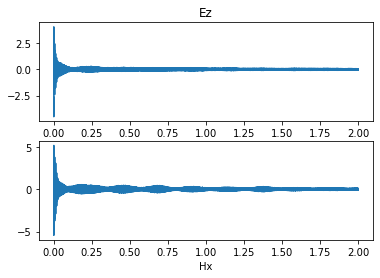

In [8]:
t1 = np.arange(0.0, 2.0, 2/len(ez_fields))
t2 = np.arange(0.0, 2.0, 2/len(hx_fields))

plt.subplot(2, 1, 1)
plt.plot(t1, ez_fields)
plt.title('Ez')

plt.subplot(2, 1, 2)
plt.plot(t2, hx_fields)
plt.xlabel('Hx')

plt.show()

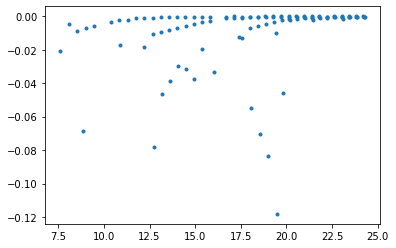

In [9]:
modes_Hx = np.array(h_hx.modes)
plt.plot(np.abs(modes_Hx[:,0]), -np.abs(modes_Hx[:,1]), '.')

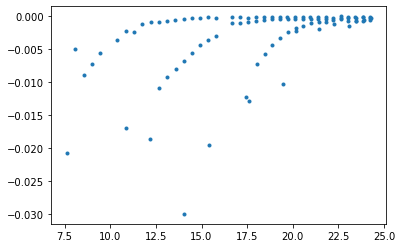

In [10]:
modes_Hx_f = modes_Hx[np.nonzero(np.abs(modes_Hx[:,1]) < 0.03)]
plt.plot(np.abs(modes_Hx_f[:,0]), -np.abs(modes_Hx_f[:,1]), '.')